# Tutorial 2 重点
**Root Finding Methods: **
*   Direct method
*   Indirective method
    - Bracketing method
    - Bisection method
    - Newton-Raphson Method
    - Secant Method
    - False Position Method

In [362]:
import sympy as sp
import math

In [363]:
## Bisection method
def bisection_method(func, a, b, error_accept):

  """
  Parameters:
  ----------------
  :param func: The user-defined function, which needs to be entered as a string.
  :param a: The initial lower root boundary.
  :param b: The initial upper root boundary.
  :param error_accept: The acceptable error tolerance (precision).
  :return: The root (midpoint between a and b).
  """
  # Define the function symbolically
  x = sp.symbols('x')
  f = sp.lambdify(x, func, "numpy")  # Convert to a lambda function for easier evaluation

  # Check if the function has different signs at the boundaries
  if f(a) * f(b) > 0:
    raise ValueError("No root or multiple roots present in the given interval. Bisection method won't work.")

  # Initialize error
  error = abs(b - a)

  # Perform bisection until the error is smaller than the accepted error
  while error > error_accept:
    c = (a + b) / 2  # Midpoint between a and b
    print(f"Current midpoint (c): {c}")  # Debug output

    # Check if the midpoint is a root
    if f(c) == 0:
      return c  # Exact root found

    # Update the interval based on the sign of f(c)
    if f(a) * f(c) < 0:
      b = c  # Root is in [a, c]
    else:
      a = c  # Root is in [c, b]

    error = abs(b - a)  # Update the error

  # Return the midpoint as the approximate root
  print(f"The error is {error}")
  print(f"The lower boundary, a, is {a} and the upper boundary, b, is {b}")
  print(f"The approximate root is {c}")
  return c

In [364]:
## Newton's Method with tol
def newton_method(func, x0, tol):
    """
    Perform Newton's Method to find the root of a function.

    Parameters:
    ----------------
    :param func: The function (as a string or symbolic expression).
    :param x0: The initial guess for the root.
    :param tol: The stopping tolerance for convergence.
    :param n: The number of iterations

    :return: Approximate root and the number of iterations.
    """
    # Define the symbolic variable
    x = sp.symbols('x')

    # Convert the function if it's given as a string
    if isinstance(func, str):
        func = sp.sympify(func)

    # Compute the derivative of the function
    func_deriv = sp.diff(func, x)
    f = sp.lambdify(x, func, "numpy")
    df = sp.lambdify(x, func_deriv, "numpy")

    # Initialize the current value of x
    x_current = x0
    iteration = 0

    while True:
        f_x = f(x_current)
        df_x = df(x_current)

        # Ensure the derivative is not zero
        if df_x == 0:
            raise ValueError("Derivative is zero. Newton's Method fails.")

        # Update the approximation
        x_next = x_current - (f_x / df_x)
        iteration += 1
        print(f'Iteration {iteration}: x = {x_next}')

        # Check for convergence
        if abs(x_next - x_current) < tol:
            break

        # Update the current value for the next iteration
        x_current = x_next

    print(f"The root was found to be approximately {x_current} after {iteration} iterations.")
    return x_current

    # Perform the Newton's Method iterations
    # for i in range (1, n+1):
    #   f_x = f(x_current)
    #   df_x = df(x_current)

    #   if df_x == 0:
    #       raise ValueError("Derivative is zero. Newton's Method fails.")

    #   # Update the approximation
    #   x_next = x_current - (f_x/df_x)
    #   print(f'Iteration {i}: x = {x_next}')

    #   # Update current value for the next iteration
    #   x_current = x_next

    # print(f"The root was found to be approximately at {x_current} after {n} iterations.")
    # return x_current

In [365]:
## Secant Method
def secant_method(func, x0, x1, tol):
  """
   Parameters:
    ----------------
    :param func: The function (as a string or symbolic expression).
    :param x0: The first initial guess for the root.
    :param x1: The second initial guess for the root.
    :param n: The number of iterations to perform.
    :param tol: The stopping tolerance for convergence.

    :return: Approximate root after `n` iterations.
  """
  # Define the symbolic variable
  x = sp.symbols('x')

  # Convert the function if it's given as a string
  if isinstance(func, str):
      func = sp.sympify(func)

  # Lambdify the function for numerical evaluation
  f = sp.lambdify(x, func, "numpy")

  # Perform Secant Method tolerance
  # Iterative process
  iteration = 0
  while True:
    f_x0 = f(x0)
    f_x1 = f(x1)

    # Ensure we don't divide by zero
    if f_x1 == f_x0:
      raise ValueError("Division by zero encountered in Secant Method. Check initial guesses.")

    # Compute the next approximation
    x_next = x1 - (f_x1 * (x1 - x0)) / (f_x1 - f_x0)

    # Print current iteration details
    iteration += 1
    print(f"Iteration {iteration}: x_next = {x_next}, f(x_next) = {f(x_next)}")

    # Check if the approximation is within the tolerance
    if abs(x_next - x1) < tol:
      break

    # Update guesses for the next iteration
    x0, x1 = x1, x_next

  print(f"The root was found to be approximately at {x_next} after {iteration} iterations.")
  return x_next


  # Perform Secant Method iterations
  # for i in range(1, n + 1):
  #     fx0 = f(x0)
  #     fx1 = f(x1)

  #     # Avoid division by zero
  #     if (fx1 - fx0) == 0:
  #         raise ValueError("Division by zero encountered in Secant Method. Check the initial guesses.")

  #     # Update the approximation
  #     x_next = x1 - (fx1 * (x1 - x0)) / (fx1 - fx0)

  #     # Print the iteration details
  #     print(f"Iteration {i}: x = {x_next}")

  #     # Update the previous values
  #     x0 = x1
  #     x1 = x_next

  # print(f"The root was found to be approximately {x_next} after {n} iterations.")
  # return x_next

In [366]:
def false_position_method(func, a, b, tol_step, tol_abs, max_iter):
    """
    Perform the False Position Method to approximate the root of a function.

    Parameters:
    ----------------
    :param func: The function (as a string or symbolic expression).
    :param a: The lower bound of the interval.
    :param b: The upper bound of the interval.
    :param tol_step: The tolerance for the step size.
    :param tol_abs: The absolute tolerance for the function value.
    :param max_iter: The maximum number of iterations to perform.

    :return: Approximate root after convergence.
    """
    # Define the symbolic variable
    x = sp.symbols('x')

    # Convert the function if it's given as a string
    if isinstance(func, str):
        func = sp.sympify(func)

    # Lambdify the function for numerical evaluation
    f = sp.lambdify(x, func, "numpy")

    # Check if the initial interval is valid (there must be a sign change between f(a) and f(b))
    if f(a) * f(b) >= 0:
        print("No root or multiple roots present in the interval. False Position Method is invalid.")
        return None

    # Initialize variables
    c = a  # initial guess
    iteration = 0

    while iteration < max_iter:
        # Calculate the next approximation using the False Position formula
        c_old = c
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))

        # Print current iteration details
        print(f"Iteration {iteration + 1}: c = {c}, f(c) = {f(c)}")

        # Check for convergence
        if abs(c - c_old) < tol_step or abs(f(c)) < tol_abs:
            print(f"Converged to root at {c} after {iteration + 1} iterations.")
            return c

        # Update the interval
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        iteration += 1

    # If max iterations are reached
    print(f"Maximum iterations reached. Approximate root at {c}.")
    return c

# Questions

## Bisection Method

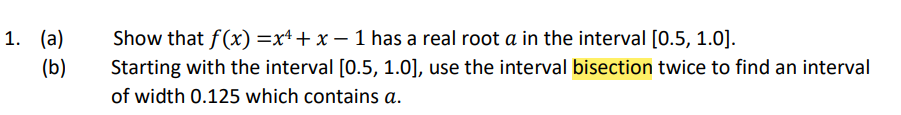

In [367]:
# 1(a)
def f(x):
    return x**4 + x - 1

# Evaluate the function at the endpoints of the interval
a = 0.5
b = 1.0

fa = f(a)
fb = f(b)

print(f"f({a}) = {fa}")
print(f"f({b}) = {fb}")

# Check if there is a sign change
if fa * fb < 0:
    print(f"There is a real root in the interval [{a}, {b}].")
else:
    print(f"No real root found in the interval [{a}, {b}].")

f(0.5) = -0.4375
f(1.0) = 1.0
There is a real root in the interval [0.5, 1.0].


In [368]:
# Function
x = sp.symbols('x')
f_expr = x**4 + x - 1  # Define the Sympy expression

# Initial interval
a = 0.5
b = 1.0
error_accept = 0.125 # Desired error tolerance

bisection_method(f_expr, a, b, error_accept)  # Pass the Sympy expression

Current midpoint (c): 0.75
Current midpoint (c): 0.625
The error is 0.125
The lower boundary, a, is 0.625 and the upper boundary, b, is 0.75
The approximate root is 0.625


0.625

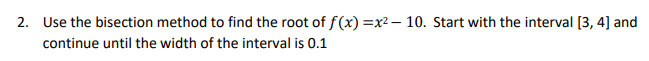

In [369]:
# Funciton
x = sp.symbols('x')
function2 = (x**2 - 10)  # Define the Sympy expression

# Set tolerence
tolerence = 0.1

# Initial interval
a = 3
b = 4

# Perform bisection method
bisection_method(function2, a, b, tolerence)

Current midpoint (c): 3.5
Current midpoint (c): 3.25
Current midpoint (c): 3.125
Current midpoint (c): 3.1875
The error is 0.0625
The lower boundary, a, is 3.125 and the upper boundary, b, is 3.1875
The approximate root is 3.1875


3.1875

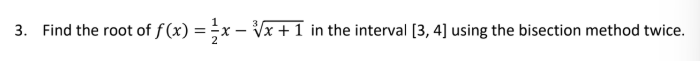

In [370]:
x = sp.symbols('x')
function3 = x/2 - ((x+1)**(1/3))

# Set tolerance
tolerance = 0.01

# Initial interval
a = 3
b = 4

bisection_method(function3, a, b, tolerance)

Current midpoint (c): 3.5
Current midpoint (c): 3.25
Current midpoint (c): 3.125
Current midpoint (c): 3.1875
Current midpoint (c): 3.21875
Current midpoint (c): 3.234375
Current midpoint (c): 3.2421875
The error is 0.0078125
The lower boundary, a, is 3.234375 and the upper boundary, b, is 3.2421875
The approximate root is 3.2421875


3.2421875

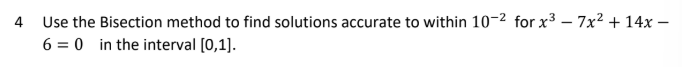

In [371]:
x = sp.symbols('x')
function4 = x**3 - 7*x**2 + 14*x - 6

# Set tolerance
tolerance = 0.01

# Initial interval
a = 0
b = 1

bisection_method(function4, a, b, tolerance)

Current midpoint (c): 0.5
Current midpoint (c): 0.75
Current midpoint (c): 0.625
Current midpoint (c): 0.5625
Current midpoint (c): 0.59375
Current midpoint (c): 0.578125
Current midpoint (c): 0.5859375
The error is 0.0078125
The lower boundary, a, is 0.578125 and the upper boundary, b, is 0.5859375
The approximate root is 0.5859375


0.5859375

## Newton-Raphson Method

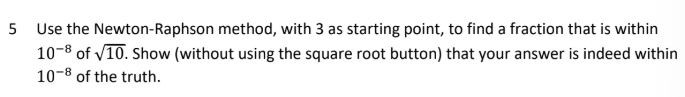

In [372]:
x = sp.symbols('x')
function5 = x**2 - 10

# Set tolerance
tol = 1e-8
# Set initial guess
x0 = 3

newton_method(function5, x0, tol)

Iteration 1: x = 3.1666666666666665
Iteration 2: x = 3.162280701754386
Iteration 3: x = 3.1622776601698424
Iteration 4: x = 3.1622776601683795
The root was found to be approximately 3.1622776601698424 after 4 iterations.


3.1622776601698424

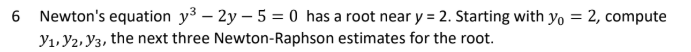

In [373]:
x = sp.symbols('x')
function6 = x**3-2*x-5

# Set tolerence
tol = 1e-8
# Set initial y
x0 = 2

newton_method(function6, x0, tol)

Iteration 1: x = 2.1
Iteration 2: x = 2.094568121104185
Iteration 3: x = 2.094551481698199
Iteration 4: x = 2.0945514815423265
The root was found to be approximately 2.094551481698199 after 4 iterations.


2.094551481698199

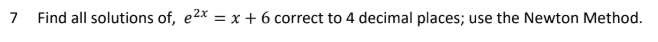

In [374]:
x = sp.symbols('x')
function7 = sp.exp(2*x)-x-6
# Set tolerence
tol = 0.0001
# Set initial x
x0 = 0

newton_method(function7, x0, tol )

Iteration 1: x = 5.0
Iteration 2: x = 4.500238355041904
Iteration 3: x = 4.000855162721532
Iteration 4: x = 3.502446296838957
Iteration 5: x = 3.0065327021010484
Iteration 6: x = 2.5169513904794645
Iteration 7: x = 2.0431452634169993
Iteration 8: x = 1.6070499701555956
Iteration 9: x = 1.2528004059571
Iteration 10: x = 1.0401311845276264
Iteration 11: x = 0.9757583605571717
Iteration 12: x = 0.9708956596039168
Iteration 13: x = 0.9708700209839554
The root was found to be approximately 0.9708956596039168 after 13 iterations.


0.9708956596039168

## Secant Method

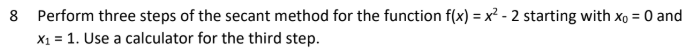

In [375]:
x=sp.symbols('x')
function8 = x**2 -2

# Set initial x
x0 = 0
x1 = 1
# Set number of iteration
n=3
# Set the tolerence
tol = 1e-6

secant_method(function8, x0, x1, tol)

Iteration 1: x_next = 2.0, f(x_next) = 2.0
Iteration 2: x_next = 1.3333333333333335, f(x_next) = -0.22222222222222188
Iteration 3: x_next = 1.4000000000000001, f(x_next) = -0.03999999999999959
Iteration 4: x_next = 1.4146341463414633, f(x_next) = 0.0011897679952408424
Iteration 5: x_next = 1.41421143847487, f(x_next) = -6.007286838860537e-06
Iteration 6: x_next = 1.4142135620573204, f(x_next) = -8.931455575122982e-10
Iteration 7: x_next = 1.4142135623730954, f(x_next) = 8.881784197001252e-16
The root was found to be approximately at 1.4142135623730954 after 7 iterations.


1.4142135623730954

## False Position Method

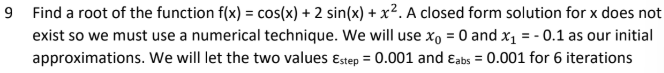

In [376]:
# Example usage
x = sp.symbols('x')
function9 = sp.cos(x) + (2 * sp.sin(x)) + (x**2)

# Set initial conditions
x0 = 0
x1 = -0.1
tol_step = 0.001
tol_abs = 0.001
max_iter = 10

# Call the method
false_position_method(function9, x0, x1, tol_step, tol_abs, max_iter)

No root or multiple roots present in the interval. False Position Method is invalid.


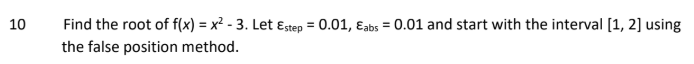

In [377]:
x = sp.symbols('x')
function10 = x**2 - 3

x0 = 1
x1 = 2
tol_step = 0.01
tol_abs = 0.01
max_iter = 6

# Call the method
false_position_method(function10, x0, x1, tol_step, tol_abs, max_iter)

Iteration 1: c = 1.6666666666666667, f(c) = -0.22222222222222188
Iteration 2: c = 1.7272727272727275, f(c) = -0.016528925619833768
Iteration 3: c = 1.7317073170731707, f(c) = -0.0011897679952408424
Converged to root at 1.7317073170731707 after 3 iterations.


1.7317073170731707